In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import itertools
import re
from itertools import product
import operator
from functools import reduce
#from pandas import option_context
#%pip install openpyxl
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-pastel')
plt.style.use('seaborn-dark')

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_86034/1792471945.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_86034/1792471945.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [1]:
import matplotlib
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
matplotlib.style.use('seaborn-v0_8')
color_list = ['white','skyblue','pink', 'tomato', 'slateblue', 'wheat', 'lightgrey', 'limegreen', 'royalblue', 'yellowgreen', 'lightseagreen', 'orchid', 'orange']
cmap = LinearSegmentedColormap.from_list("",color_list)
from matplotlib.widgets import Cursor 
import mplcursors

In [2]:
# Import all the google connexion packages
import os
import google.auth
from google.cloud import bigquery
from google.auth import impersonated_credentials

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/a20015173/.config/gcloud/legacy_credentials/ekaterina.rezanovich@adeo.com/adc.json"
client_1 = bigquery.Client(project = 'ccdp-transverse-data-dev')

In [3]:
project_id = "ccdp-transverse-data-dev"
dataset_id = "ccdp_kg_project"
table_target = "kg_concept_metrics_jan_24"
table_target_2 = ""

In [4]:
filepath_0 = "./datasets/product_concept.parquet"
df_product_rel_branch = pd.read_parquet(filepath_0)
df_product_rel_branch.head(3)

,productCode,date,concept_code,rn_0
0,89959659,2024-01-12 21:48:19.027,https://opus-adeo.poolparty.biz/COMMONTAXO/3387,1
1,89963789,2024-01-10 04:24:06.630,https://opus-adeo.poolparty.biz/COMMONTAXO/3387,1
2,90082049,2023-11-21 03:19:03.715,https://opus-adeo.poolparty.biz/COMMONTAXO/3557,1


### User Activity and query  
Data for January 2024

In [5]:
filepath_1 = "./datasets/uq_concept_1_24.parquet"
df_uq_r = pd.read_parquet(filepath_1)
df_uq_r.head(3)

,product_code,concept_code,f0_
0,70719971,https://opus-adeo.poolparty.biz/COMMONTAXO/5086,251
1,83407496,https://opus-adeo.poolparty.biz/COMMONTAXO/3700,63
2,86143953,https://opus-adeo.poolparty.biz/COMMONTAXO/8492,50


In [6]:
df_uq_r.columns = ['product_code', 'concept_code', 'nb_q']

In [7]:
query = """
    SELECT *
    from `ccdp-transverse-data-dev.ccdp_kg_project.piano_data_jan24_p1`
    """
df_p_1 = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")

In [8]:
query = """
    SELECT *
    from `ccdp-transverse-data-dev.ccdp_kg_project.piano_data_jan24_p2`
    """
df_p_2 = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")

In [9]:
query = """
    SELECT *
    from `ccdp-transverse-data-dev.ccdp_kg_project.piano_data_jan24_p3`
    """
df_p_3 = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")

In [10]:
query = """
    SELECT *
    from `ccdp-transverse-data-dev.ccdp_kg_project.piano_data_jan24_p4`
    """
df_p_4 = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")

In [11]:
frames = [df_p_1, df_p_2, df_p_3, df_p_4]
df_piano_0 = pd.concat(frames)

In [12]:
df_piano_0.head()

,productCode,nb_display,nb_click,nb_visit
0,82389392,270,3,256
1,87540805,280,5,256
2,84648983,282,4,256
3,62583493,283,11,256
4,88680382,285,3,256


In [13]:
df_piano = df_piano_0.groupby('productCode').agg({'nb_display':'sum', 'nb_click':'sum', 'nb_visit':'sum'}).reset_index()
df_piano.head()

,productCode,nb_display,nb_click,nb_visit
0,10004981,3,0,3
1,10012,3,0,3
2,10015831,26,0,25
3,10021445,857,33,762
4,10021515,141,1,138


In [14]:
df_piano.columns = [ 'product_code', 'nb_display', 'nb_click', 'nb_visit']
df_piano_gr = df_piano.copy()

In [15]:
df_uq_pr_act = df_uq_r.merge(df_piano_gr, left_on = 'product_code', right_on='product_code', how='left')
df_uq_pr_act.head(3)

,product_code,concept_code,nb_q,nb_display,nb_click,nb_visit
0,70719971,https://opus-adeo.poolparty.biz/COMMONTAXO/5086,251,1552,65,1307
1,83407496,https://opus-adeo.poolparty.biz/COMMONTAXO/3700,63,248,4,222
2,86143953,https://opus-adeo.poolparty.biz/COMMONTAXO/8492,50,55,1,45


In [16]:
df_uq_pr_act['ctr'] = (df_uq_pr_act['nb_click'] / df_uq_pr_act['nb_display']).round(2)
df_uq_pr_act.head(3)

,product_code,concept_code,nb_q,nb_display,nb_click,nb_visit,ctr
0,70719971,https://opus-adeo.poolparty.biz/COMMONTAXO/5086,251,1552,65,1307,0.04
1,83407496,https://opus-adeo.poolparty.biz/COMMONTAXO/3700,63,248,4,222,0.02
2,86143953,https://opus-adeo.poolparty.biz/COMMONTAXO/8492,50,55,1,45,0.02


In [17]:
df_uq_pr_act.shape[0]

29356268

In [18]:
df_uq_pr_act[df_uq_pr_act['nb_display']<df_uq_pr_act['nb_click']].shape[0]

4323

In [19]:
df_uq_pr_act[df_uq_pr_act['nb_display']>df_uq_pr_act['nb_click']].shape[0]

27725602

In [20]:
df_uq_pr_act[df_uq_pr_act['nb_display'].isna()].shape[0]

1608858

There are 3 type of data:  
1. correct : nb_display >= nb_click  
2. not correct : nb_display < nb_click  
3. no user activity data in piano  
--> use only data with user activity from piano

In [21]:
#df with clean user activity data
df_uq_pr_act = df_uq_pr_act[df_uq_pr_act['nb_display']>=df_uq_pr_act['nb_click']]
df_uq_pr_act.shape[0]

27743087

In [22]:
df_uq_pr_act.head(2)

,product_code,concept_code,nb_q,nb_display,nb_click,nb_visit,ctr
0,70719971,https://opus-adeo.poolparty.biz/COMMONTAXO/5086,251,1552,65,1307,0.04
1,83407496,https://opus-adeo.poolparty.biz/COMMONTAXO/3700,63,248,4,222,0.02


Looks like in search data there are more products linked to the concept --> filter only products with correct concept according to the KG info

In [23]:
filepath_3 = "./datasets/product_concept.parquet"
df_pr_conc = pd.read_parquet(filepath_3)
df_pr_conc.head(3)

,productCode,date,concept_code,rn_0
0,89959659,2024-01-12 21:48:19.027,https://opus-adeo.poolparty.biz/COMMONTAXO/3387,1
1,89963789,2024-01-10 04:24:06.630,https://opus-adeo.poolparty.biz/COMMONTAXO/3387,1
2,90082049,2023-11-21 03:19:03.715,https://opus-adeo.poolparty.biz/COMMONTAXO/3557,1


In [24]:
df_pr_conc_2 = df_pr_conc.copy()
del df_pr_conc_2['rn_0']
df_pr_conc_2.columns = ['pr_c','d','conc_c']
df_pr_conc_2.head(2)

,pr_c,d,conc_c
0,89959659,2024-01-12 21:48:19.027,https://opus-adeo.poolparty.biz/COMMONTAXO/3387
1,89963789,2024-01-10 04:24:06.630,https://opus-adeo.poolparty.biz/COMMONTAXO/3387


In [25]:
df_uq_pr_act = df_uq_pr_act.merge(df_pr_conc_2[['pr_c','d','conc_c']], left_on=['product_code','concept_code'],\
                                    right_on=['pr_c','conc_c'], how='left')
df_uq_pr_act.head()

,product_code,concept_code,nb_q,nb_display,nb_click,nb_visit,ctr,pr_c,d,conc_c
0,70719971,https://opus-adeo.poolparty.biz/COMMONTAXO/5086,251,1552,65,1307,0.04,NaN,NaT,NaN
1,83407496,https://opus-adeo.poolparty.biz/COMMONTAXO/3700,63,248,4,222,0.02,83407496,2023-03-16 15:59:29.590,https://opus-adeo.poolparty.biz/COMMONTAXO/3700
2,86143953,https://opus-adeo.poolparty.biz/COMMONTAXO/8492,50,55,1,45,0.02,NaN,NaT,NaN
3,86233341,https://opus-adeo.poolparty.biz/COMMONTAXO/5692,46,38,0,34,0.0,86233341,2023-06-29 19:27:48.667,https://opus-adeo.poolparty.biz/COMMONTAXO/5692
4,88572254,https://opus-adeo.poolparty.biz/COMMONTAXO/3954,34,36,0,34,0.0,NaN,NaT,NaN


In [26]:
def pr_c(df):
    if df['pr_c']==df['product_code']:
        return 1
    else:
        return 0

In [27]:
df_uq_pr_act['pr_check'] = df_uq_pr_act.apply(pr_c, axis=1)
df_uq_pr_act.head()

,product_code,concept_code,nb_q,nb_display,nb_click,nb_visit,ctr,pr_c,d,conc_c,pr_check
0,70719971,https://opus-adeo.poolparty.biz/COMMONTAXO/5086,251,1552,65,1307,0.04,NaN,NaT,NaN,0
1,83407496,https://opus-adeo.poolparty.biz/COMMONTAXO/3700,63,248,4,222,0.02,83407496,2023-03-16 15:59:29.590,https://opus-adeo.poolparty.biz/COMMONTAXO/3700,1
2,86143953,https://opus-adeo.poolparty.biz/COMMONTAXO/8492,50,55,1,45,0.02,NaN,NaT,NaN,0
3,86233341,https://opus-adeo.poolparty.biz/COMMONTAXO/5692,46,38,0,34,0.0,86233341,2023-06-29 19:27:48.667,https://opus-adeo.poolparty.biz/COMMONTAXO/5692,1
4,88572254,https://opus-adeo.poolparty.biz/COMMONTAXO/3954,34,36,0,34,0.0,NaN,NaT,NaN,0


In [28]:
df_uq_pr_act.groupby('pr_check')['product_code'].nunique().reset_index()

,pr_check,product_code
0,0,2294090
1,1,2206509


In [29]:
df_uq_pr_act = df_uq_pr_act[df_uq_pr_act['pr_check']==1]

Concept metrics

In [30]:
df_uq_concept_ctr = df_uq_pr_act.groupby('concept_code').agg({'product_code': 'nunique', 'nb_q': 'sum',\
                                                              'nb_display': 'sum', 'nb_click': 'sum',\
                                                              'nb_visit': 'sum', 'ctr': 'mean'}).reset_index()
df_uq_concept_ctr.columns = ['concept_code', 'nb_pr_in_uq', 'nb_q', 'nb_display', 'nb_click', 'nb_visit', 'avg_ctr']
df_uq_concept_ctr.head(3)

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr
0,https://opus-adeo.poolparty.biz/COMMONTAXO/1,48,96,125335,10785,101872,0.083958
1,https://opus-adeo.poolparty.biz/COMMONTAXO/10,38,5706,23796,953,20537,0.020789
2,https://opus-adeo.poolparty.biz/COMMONTAXO/100,1154,324462,137207,6694,117397,0.02662


Create the table with number of products in the concept

In [31]:
df_pr_conc.head(2)

,productCode,date,concept_code,rn_0
0,89959659,2024-01-12 21:48:19.027,https://opus-adeo.poolparty.biz/COMMONTAXO/3387,1
1,89963789,2024-01-10 04:24:06.630,https://opus-adeo.poolparty.biz/COMMONTAXO/3387,1


In [32]:
del df_pr_conc['rn_0']
df_pr_conc.columns = ['product_code', 'date', 'concept_code']

In [33]:
df_concept_gr = df_pr_conc.groupby('concept_code')['product_code'].nunique().reset_index()
df_concept_gr.columns = ['concept_code','nb_pr']
df_concept_gr.head()

,concept_code,nb_pr
0,https://opus-adeo.poolparty.biz/COMMONTAXO/1,53964
1,https://opus-adeo.poolparty.biz/COMMONTAXO/10,107
2,https://opus-adeo.poolparty.biz/COMMONTAXO/100,1904
3,https://opus-adeo.poolparty.biz/COMMONTAXO/1000,797
4,https://opus-adeo.poolparty.biz/COMMONTAXO/1001,29


In [34]:
df_concept_metrics_1 = df_uq_concept_ctr.merge(df_concept_gr, left_on='concept_code', right_on='concept_code', how='left')
df_concept_metrics_1.head(3)

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr
0,https://opus-adeo.poolparty.biz/COMMONTAXO/1,48,96,125335,10785,101872,0.083958,53964
1,https://opus-adeo.poolparty.biz/COMMONTAXO/10,38,5706,23796,953,20537,0.020789,107
2,https://opus-adeo.poolparty.biz/COMMONTAXO/100,1154,324462,137207,6694,117397,0.02662,1904


Create the table with rating of the concept according to the user activity

In [35]:
df_uq_r.head(2)

,product_code,concept_code,nb_q
0,70719971,https://opus-adeo.poolparty.biz/COMMONTAXO/5086,251
1,83407496,https://opus-adeo.poolparty.biz/COMMONTAXO/3700,63


In [36]:
df_uq_gr = df_uq_r.groupby('concept_code')['nb_q'].sum().reset_index()
# del df_uq_gr['index']
df_uq_gr = df_uq_gr.sort_values(by='nb_q', ascending=False).reset_index()
df_uq_gr['rating'] = df_uq_gr.index
df_uq_gr.head()

,index,concept_code,nb_q,rating
0,8725,https://opus-adeo.poolparty.biz/COMMONTAXO/8600,38354431,0
1,4988,https://opus-adeo.poolparty.biz/COMMONTAXO/3097,37969640,1
2,3915,https://opus-adeo.poolparty.biz/COMMONTAXO/23050,36597316,2
3,5423,https://opus-adeo.poolparty.biz/COMMONTAXO/3552,34353335,3
4,4751,https://opus-adeo.poolparty.biz/COMMONTAXO/2864,33562997,4


!!! there are not the same numbers for the nb of uwer queries for rating and in the table with the metrics because in the table with the metrics there are only products with data in piano

In [37]:
df_concept_metrics = df_concept_metrics_1.merge(df_uq_gr[['concept_code', 'rating']], left_on='concept_code',\
                                                  right_on = 'concept_code', how='left')
df_concept_metrics.head()

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr,rating
0,https://opus-adeo.poolparty.biz/COMMONTAXO/1,48,96,125335,10785,101872,0.083958,53964,8279
1,https://opus-adeo.poolparty.biz/COMMONTAXO/10,38,5706,23796,953,20537,0.020789,107,4963
2,https://opus-adeo.poolparty.biz/COMMONTAXO/100,1154,324462,137207,6694,117397,0.02662,1904,610
3,https://opus-adeo.poolparty.biz/COMMONTAXO/1000,553,2751,41913,1172,36277,0.011537,797,6417
4,https://opus-adeo.poolparty.biz/COMMONTAXO/1001,16,3669,17745,712,14896,0.039375,29,5203


In [38]:
df_concept_metrics['perc_q_pr'] = (df_concept_metrics['nb_pr_in_uq'] / df_concept_metrics['nb_pr']).round(2)
df_concept_metrics = df_concept_metrics.sort_values(by='avg_ctr')
df_concept_metrics.head()

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr,rating,perc_q_pr
776,https://opus-adeo.poolparty.biz/COMMONTAXO/1588,1,1,1,0,1,0.0,1,8883,1.00
4668,https://opus-adeo.poolparty.biz/COMMONTAXO/4545,1,4,80,0,68,0.0,3,8203,0.33
2009,https://opus-adeo.poolparty.biz/COMMONTAXO/19895,1,8,4,0,4,0.0,12,7406,0.08
5516,https://opus-adeo.poolparty.biz/COMMONTAXO/5408,1,2,2,0,2,0.0,1,7435,1.00
4406,https://opus-adeo.poolparty.biz/COMMONTAXO/4271,1,47,43,0,42,0.0,3,7863,0.33


In [39]:
from google.cloud import bigquery

# Initialize the BigQuery client
client = bigquery.Client(project=project_id)

table_ref = client.dataset(dataset_id).table(table_target)
table = bigquery.Table(table_ref)

# Load the DataFrame into BigQuery
job_config = bigquery.LoadJobConfig()
job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE
# OR
# job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND

client.load_table_from_dataframe(df_concept_metrics, table, job_config=job_config).result()

LoadJob<project=ccdp-transverse-data-dev, location=EU, id=2bb6c9f2-fb75-446a-ab3e-ffef028d94f6>

#### With these metrics it is possible to check the concepts

Check concept with a lot of products, low ctr and high rating

In [40]:
df_concept_metrics.sort_values(by='nb_pr', ascending=False).head()

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr,rating,perc_q_pr
3585,https://opus-adeo.poolparty.biz/COMMONTAXO/3387,28174,344293,26995717,1200226,22596688,0.030767,1041761,1747,0.03
5451,https://opus-adeo.poolparty.biz/COMMONTAXO/5333,99869,1880269,16698580,718536,14405759,0.024037,907375,419,0.11
3590,https://opus-adeo.poolparty.biz/COMMONTAXO/3391,178767,21363013,33850564,1403871,29217257,0.025399,804707,11,0.22
6596,https://opus-adeo.poolparty.biz/COMMONTAXO/840,105230,2688598,30245543,1304532,25466323,0.024551,562981,347,0.19
5681,https://opus-adeo.poolparty.biz/COMMONTAXO/5592,126202,17519510,19368316,753270,16857868,0.023089,328283,23,0.38


In [41]:
df_concept_metrics[df_concept_metrics['avg_ctr']==0]['concept_code'].nunique()/df_concept_metrics['concept_code'].nunique()

0.00583941605839416

In [42]:
df_concept_metrics[df_concept_metrics['avg_ctr']==0]['concept_code'].nunique()

40

0.05 %  (40 concepts in January 2024) of concepts have 0 ctr

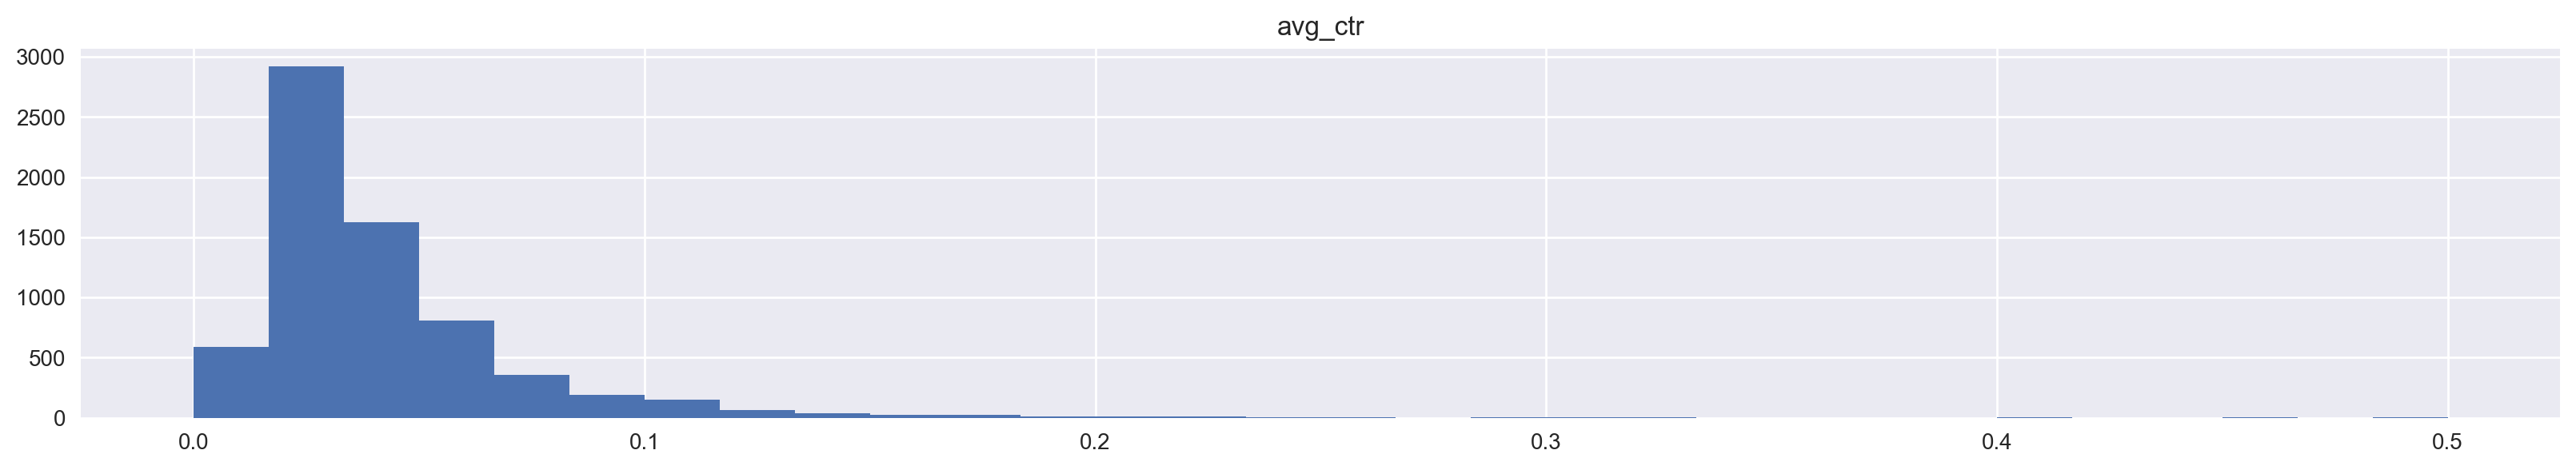

In [43]:
df_concept_metrics.hist(column='avg_ctr', bins = 30, figsize=(20,3));

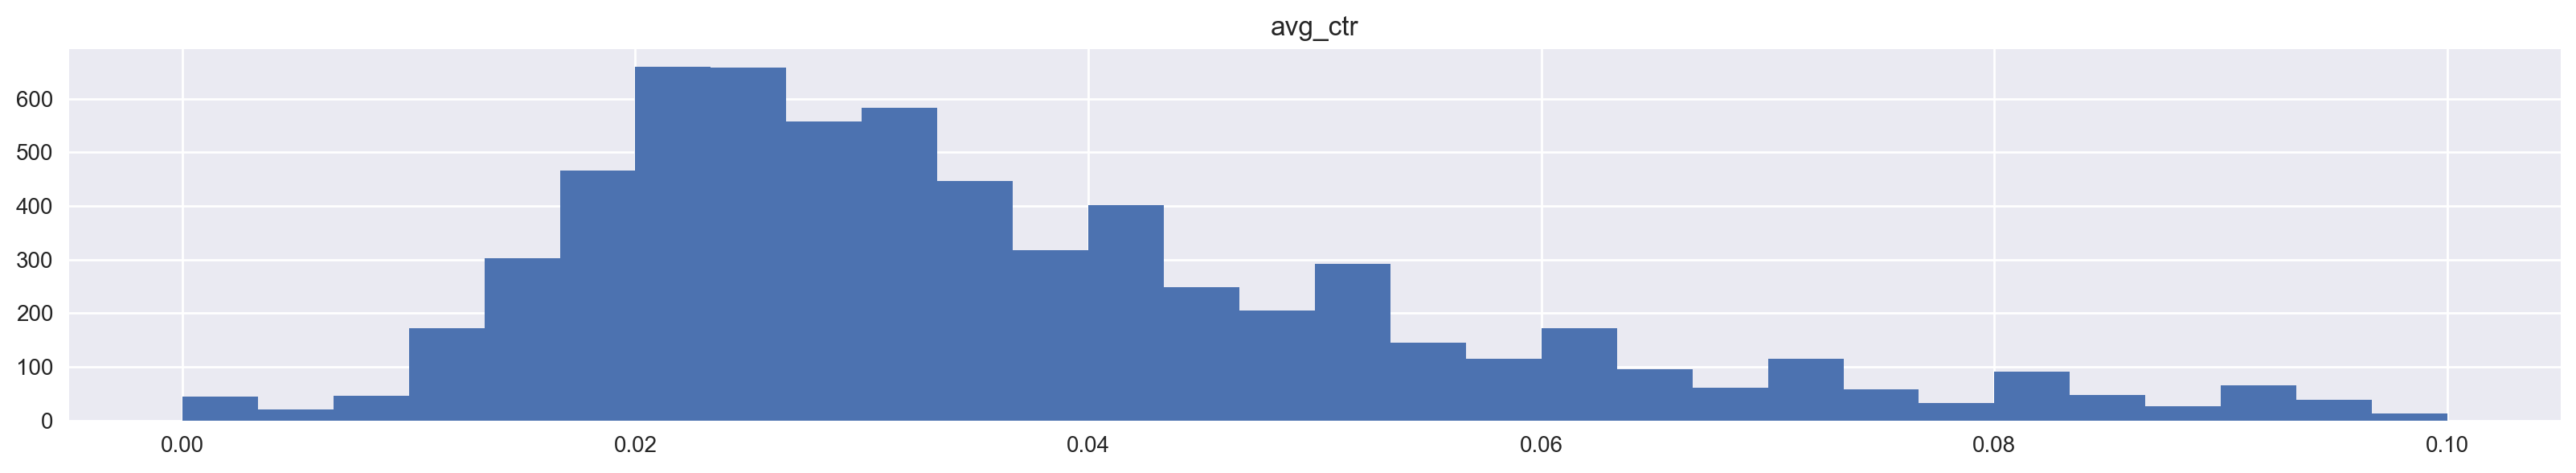

In [44]:
df_concept_metrics[df_concept_metrics['avg_ctr']<0.1].hist(column='avg_ctr', bins = 30, figsize=(20,3));

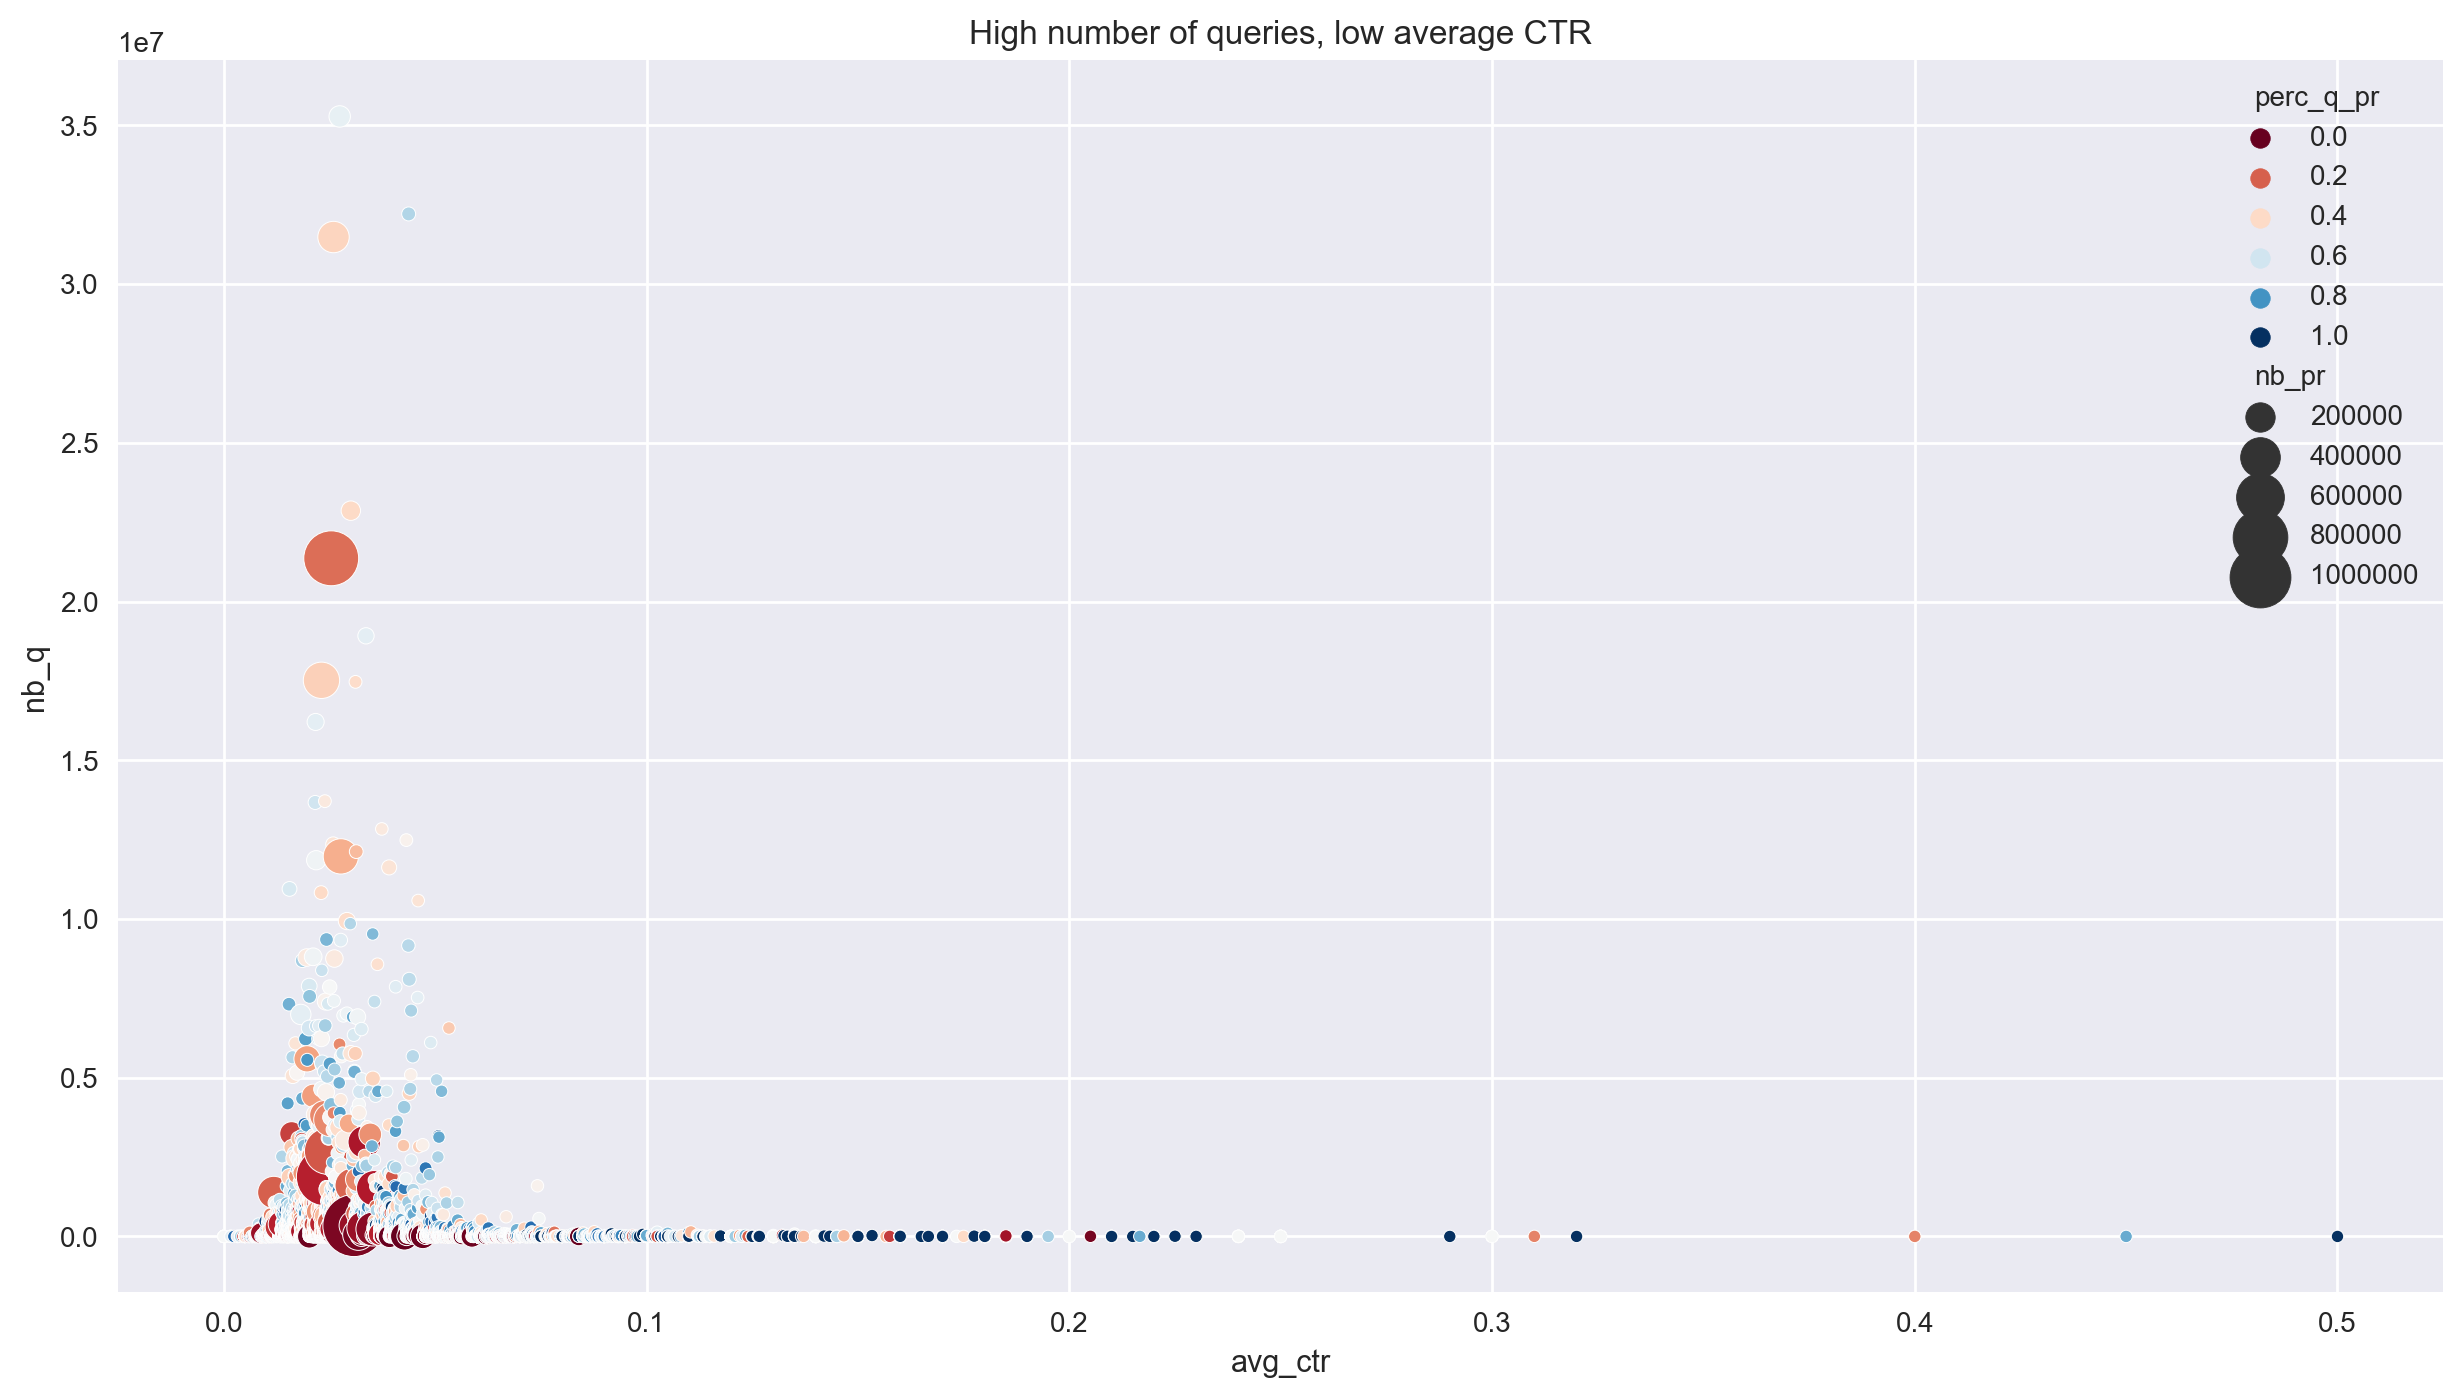

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_concept_metrics, x='avg_ctr', y="nb_q", \
     size = "nb_pr", hue="perc_q_pr", edgecolors="black", palette="RdBu",\
     alpha=1, sizes=(20, 500))
plt.title('High number of queries, low average CTR')
plt.show()

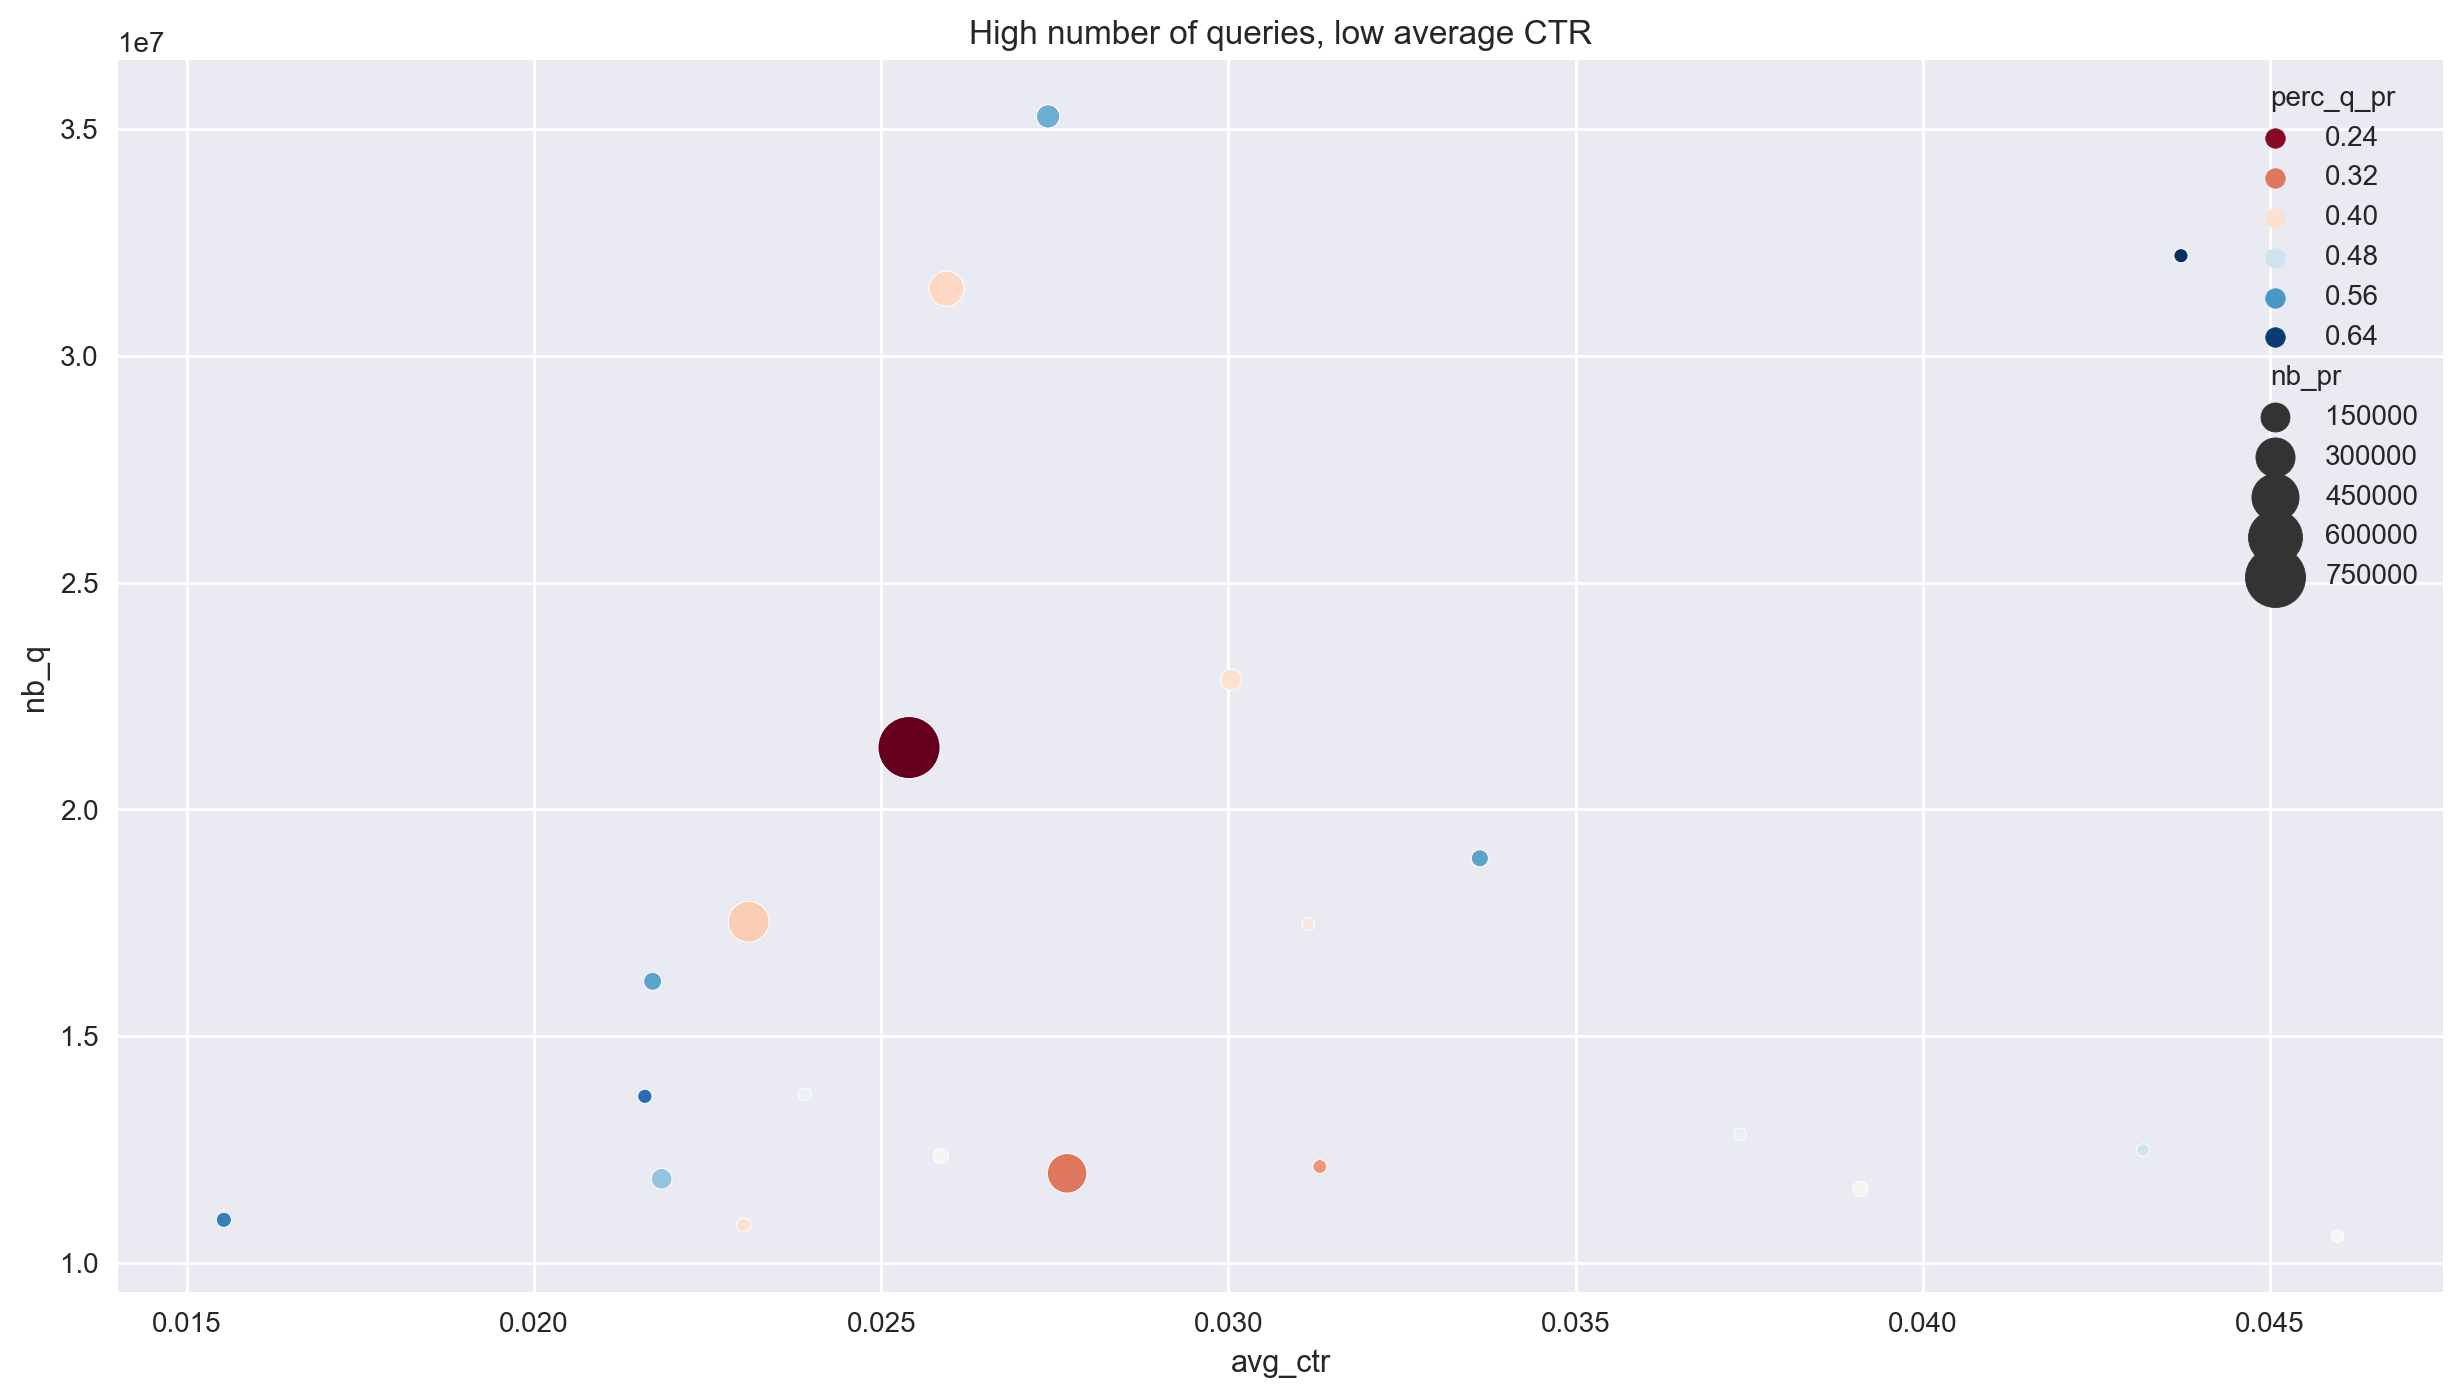

In [54]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_concept_metrics[(df_concept_metrics['nb_q']>10000000)&(df_concept_metrics['avg_ctr']<0.1)], x='avg_ctr', y="nb_q", \
     size = "nb_pr", hue="perc_q_pr", edgecolors="black", palette="RdBu",\
     alpha=1, sizes=(20, 500))
plt.title('High number of queries, low average CTR')
plt.show()

In [55]:
df_ch = df_concept_metrics[(df_concept_metrics['nb_q']>10000000)&(df_concept_metrics['avg_ctr']<0.1)]
df_ch['concept_code'].nunique()

21

In [56]:
df_ch.sort_values(by='rating', ascending=True).head(20)

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr,rating,perc_q_pr
6692,https://opus-adeo.poolparty.biz/COMMONTAXO/8600,7458,32210913,10987907,672848,8998249,0.043717,11547,0,0.65
3322,https://opus-adeo.poolparty.biz/COMMONTAXO/3097,46557,35282111,7585462,385693,6428538,0.027402,85695,1,0.54
3718,https://opus-adeo.poolparty.biz/COMMONTAXO/3552,7228,13671290,2697224,100048,2374635,0.021595,12085,3,0.60
3095,https://opus-adeo.poolparty.biz/COMMONTAXO/2864,90410,31483236,5632243,290513,4950234,0.025939,234196,4,0.39
3698,https://opus-adeo.poolparty.biz/COMMONTAXO/3528,1331,13712264,2195103,92211,1879430,0.023899,2926,5,0.45
3594,https://opus-adeo.poolparty.biz/COMMONTAXO/3396,25443,22862692,9321824,375394,7887332,0.030038,62882,6,0.40
3656,https://opus-adeo.poolparty.biz/COMMONTAXO/3474,608,12837378,2852720,158287,2326537,0.037368,1342,8,0.45
6168,https://opus-adeo.poolparty.biz/COMMONTAXO/6128,17260,18920959,3145759,167452,2526682,0.03362,31509,9,0.55
3590,https://opus-adeo.poolparty.biz/COMMONTAXO/3391,178767,21363013,33850564,1403871,29217257,0.025399,804707,11,0.22
579,https://opus-adeo.poolparty.biz/COMMONTAXO/15334,1219,17470050,4801077,204932,3912225,0.031148,3005,14,0.41


In [57]:
filepath_rel_un = "./datasets/rel_unp.parquet"
df_rel_un = pd.read_parquet(filepath_rel_un)
df_rel_un.head(1)

,concept_id,level_num,grand_parent_concept
0,https://opus-adeo.poolparty.biz/COMMONTAXO/0,1,https://opus-adeo.poolparty.biz/COMMONTAXO/0


In [61]:
df_conc_ch = df_ch.merge(df_rel_un, left_on='concept_code', right_on='concept_id',how='left')
del df_conc_ch['concept_id']
df_conc_ch.head()

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr,rating,perc_q_pr,level_num,grand_parent_concept
0,https://opus-adeo.poolparty.biz/COMMONTAXO/4032,10611,10947532,2143080,93669,1778524,0.015532,18154,53,0.58,3,https://opus-adeo.poolparty.biz/COMMONTAXO/0
1,https://opus-adeo.poolparty.biz/COMMONTAXO/3552,7228,13671290,2697224,100048,2374635,0.021595,12085,3,0.60,4,https://opus-adeo.poolparty.biz/COMMONTAXO/0
2,https://opus-adeo.poolparty.biz/COMMONTAXO/5450,21274,16207577,3490766,169969,2987329,0.021707,38573,19,0.55,3,https://opus-adeo.poolparty.biz/COMMONTAXO/0
3,https://opus-adeo.poolparty.biz/COMMONTAXO/5735,31439,11852099,3092473,119440,2830591,0.021836,60890,46,0.52,4,https://opus-adeo.poolparty.biz/COMMONTAXO/0
4,https://opus-adeo.poolparty.biz/COMMONTAXO/5425,4125,10830764,1788463,91691,1531434,0.023016,10331,30,0.40,3,https://opus-adeo.poolparty.biz/COMMONTAXO/0


In [62]:
df_conc_ch.groupby('grand_parent_concept')['concept_code'].nunique().reset_index()

,grand_parent_concept,concept_code
0,https://opus-adeo.poolparty.biz/COMMONTAXO/0,21


In [63]:
df_conc_ch.groupby('level_num')['concept_code'].nunique().reset_index()

,level_num,concept_code
0,2,1
1,3,11
2,4,8
3,5,1


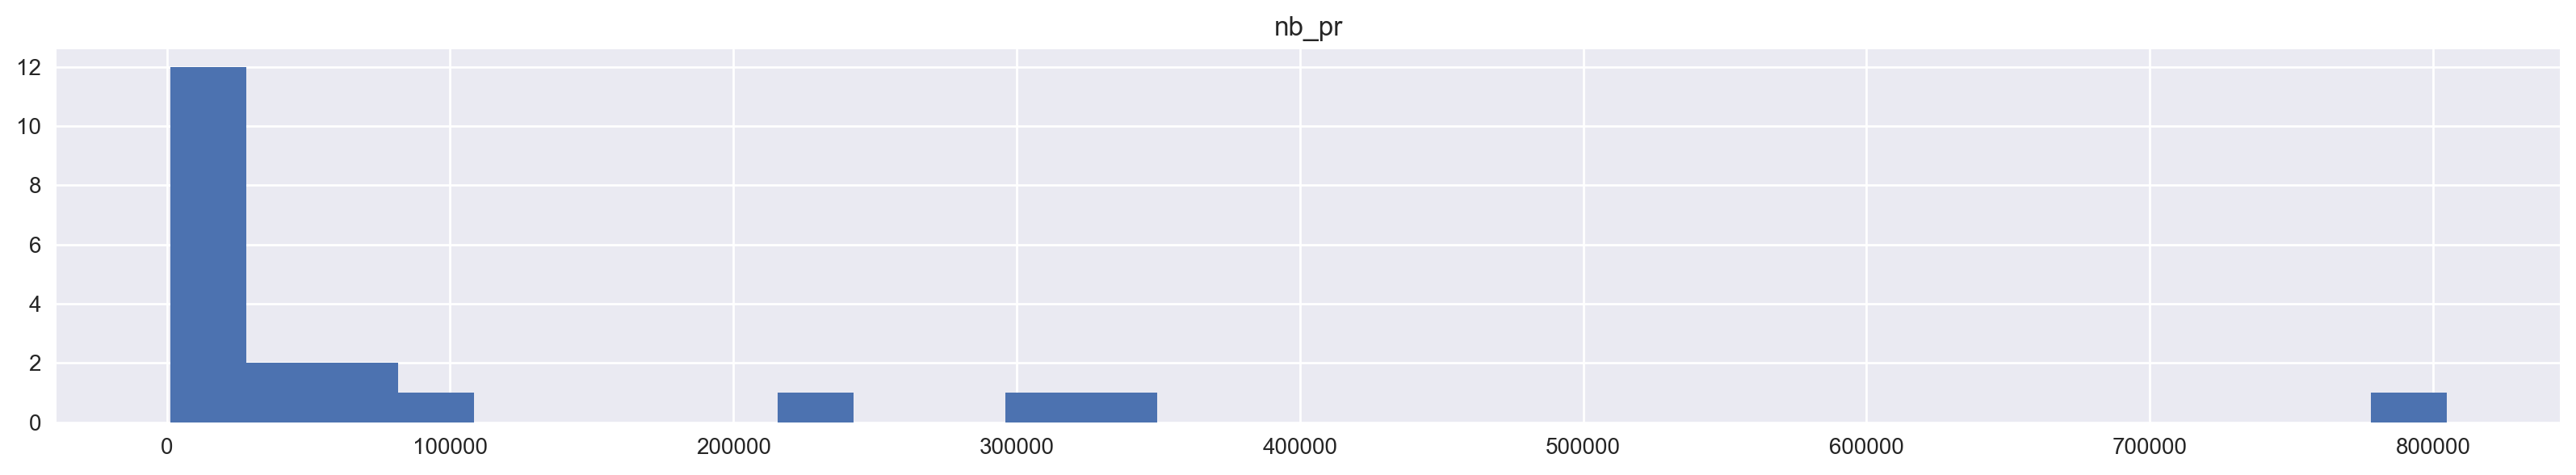

In [64]:
df_conc_ch.hist(column='nb_pr', bins = 30, figsize=(20,3));

Summary:  
1. All of these concepts have one grand-parent concept : 'https://opus-adeo.poolparty.biz/COMMONTAXO/0'  
2. Most of them 3 and 4 levels of the concepts  
3. 